In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

# Load Datas

In [2]:
dataBrut = pd.read_csv("atlas-higgs-challenge-2014-v2.csv") 
# Preview the first 5 lines of the loaded data 
dataBrut.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


In [3]:
dataBrut["Label"].value_counts()

b    538678
s    279560
Name: Label, dtype: int64

In [4]:
#Remove bad columns

dataLabel = dataBrut.drop(["EventId","Weight","KaggleSet","KaggleWeight"], axis=1)
data = dataBrut.drop(["EventId","Weight","KaggleSet","KaggleWeight","Label"], axis=1)
data.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [5]:
data.shape

(818238, 30)

In [6]:
data.ndim

2

In [7]:
data.dtypes

DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta            float64
PRI_jet_leading_phi      

In [8]:
data = data.replace(-999.0,np.nan)
dataLabel = dataLabel.replace(-999.0,np.nan)
data.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,693636.000000,818238.000000,818238.000000,818238.000000,237985.000000,237985.000000,237985.000000,818238.000000,818238.000000,818238.000000,...,818238.000000,818238.000000,818238.000000,490867.000000,490867.000000,490867.000000,237985.000000,237985.000000,237985.000000,818238.000000
mean,121.867697,49.252714,81.140561,57.849524,2.404626,372.181050,-0.828740,2.373871,18.969617,158.596159,...,-0.008634,209.908730,0.979923,84.904285,-0.001248,-0.018856,57.810286,-0.006669,-0.010470,73.205594
std,56.942487,35.378609,40.582708,63.411938,1.742546,398.235393,3.583769,0.780875,21.918491,116.089809,...,1.812703,126.816686,0.978793,60.649530,1.779419,1.815363,32.455466,2.031695,1.816033,98.331754
min,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-19.012000,0.208000,0.000000,46.103000,...,-3.142000,13.678000,0.000000,30.000000,-4.500000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,91.862000,19.304000,59.414000,14.164250,0.886000,112.628000,-2.626000,1.814000,2.839000,77.492000,...,-1.574000,122.985000,0.000000,44.488000,-1.337000,-1.591000,37.325000,-1.604000,-1.589000,0.000000
50%,112.501000,46.484000,73.744000,38.470000,2.101000,226.193000,-0.244000,2.492000,12.383000,120.665000,...,-0.019000,179.883000,1.000000,65.760000,0.000000,-0.044000,47.993000,-0.011000,-0.020000,40.506000
75%,135.576000,73.620000,92.188000,79.226750,3.691000,478.782000,0.945000,2.962000,27.634000,200.884500,...,1.559000,263.828000,2.000000,103.569500,1.336000,1.557000,66.695000,1.593000,1.568000,110.387000
max,1949.261000,968.669000,1349.351000,2834.999000,8.724000,4974.979000,17.650000,5.751000,2834.999000,2079.162000,...,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


# Heatmap of correlation between features

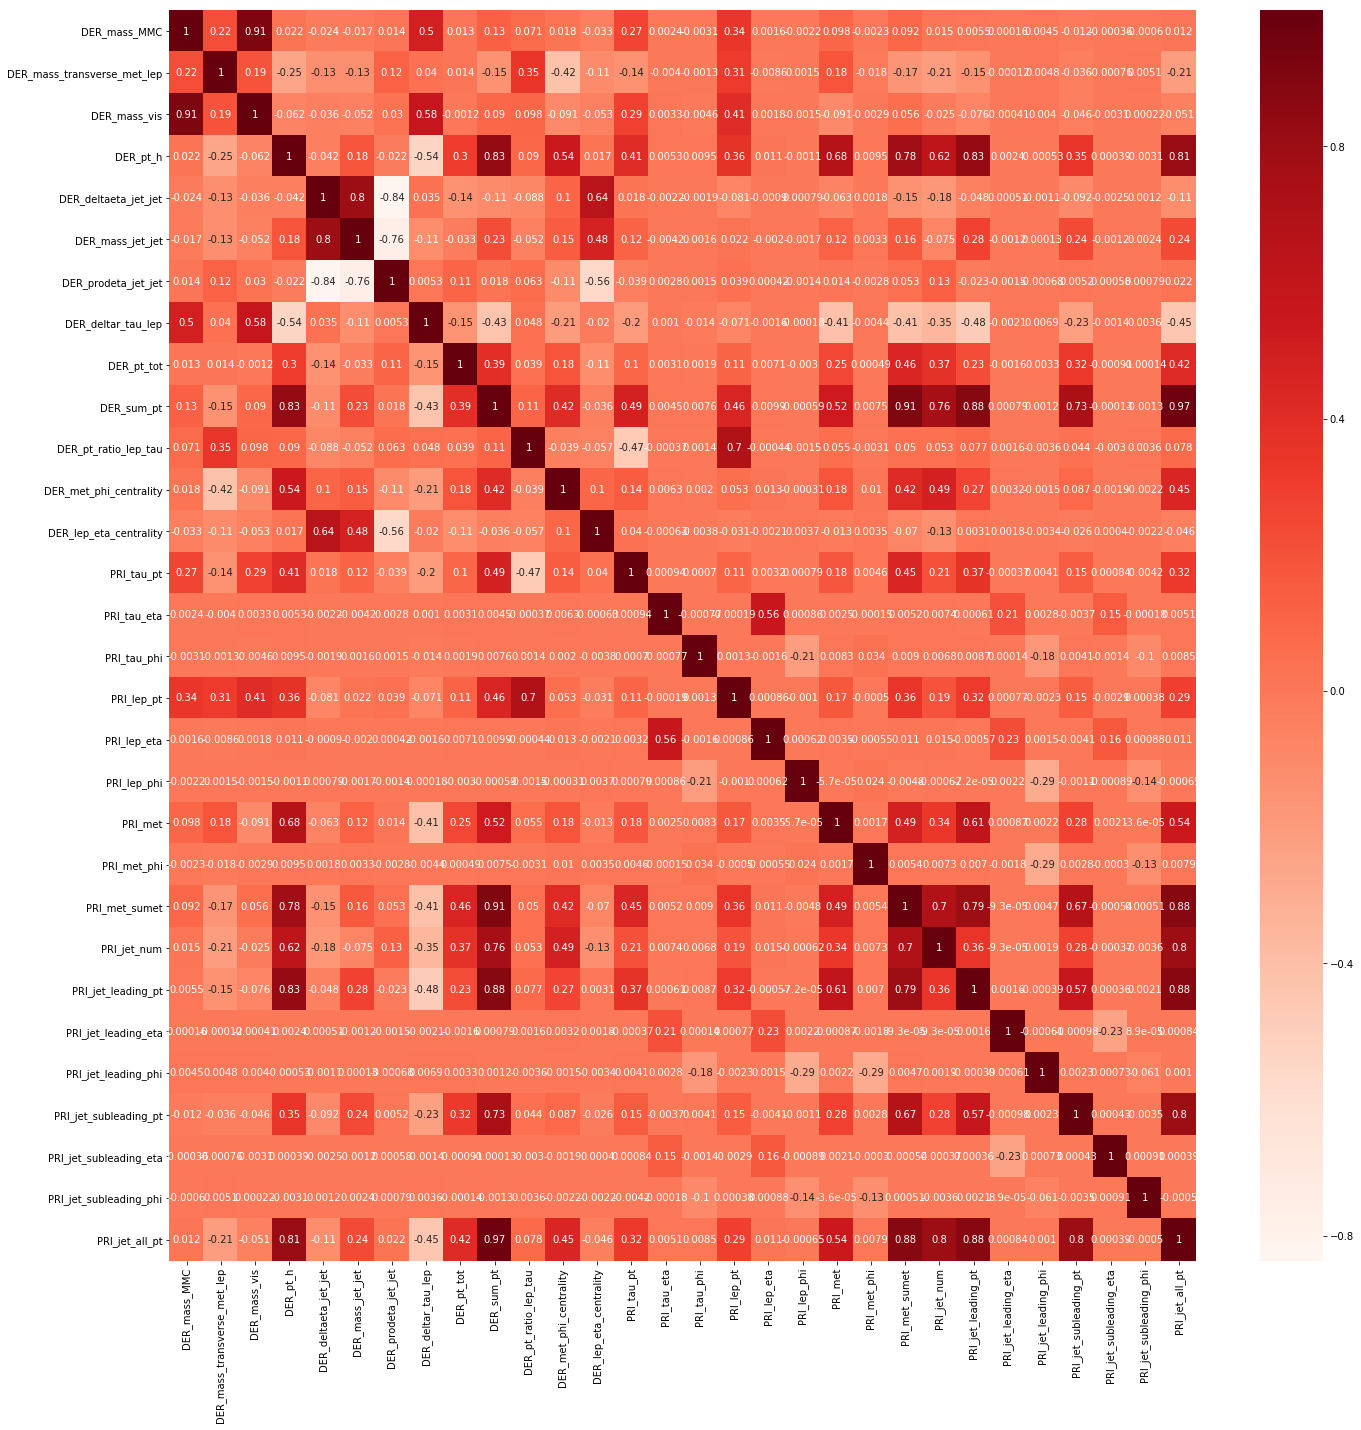

In [9]:
#HeatMap
plt.figure(figsize=(23,23))
cor = data.corr()
cor.index = data.columns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('heatmap.png')
plt.show()

In [10]:
#Example of correlation of two features

#Correlation with DER_mass_MMC variable
cor_target = abs(cor["DER_mass_MMC"])

In [11]:
#Selecting highly correlated features with DER_mass_MMC
relevant_features = cor_target[cor_target>0.5]
relevant_features

DER_mass_MMC    1.0000
DER_mass_vis    0.9127
Name: DER_mass_MMC, dtype: float64

# Histograms of datas

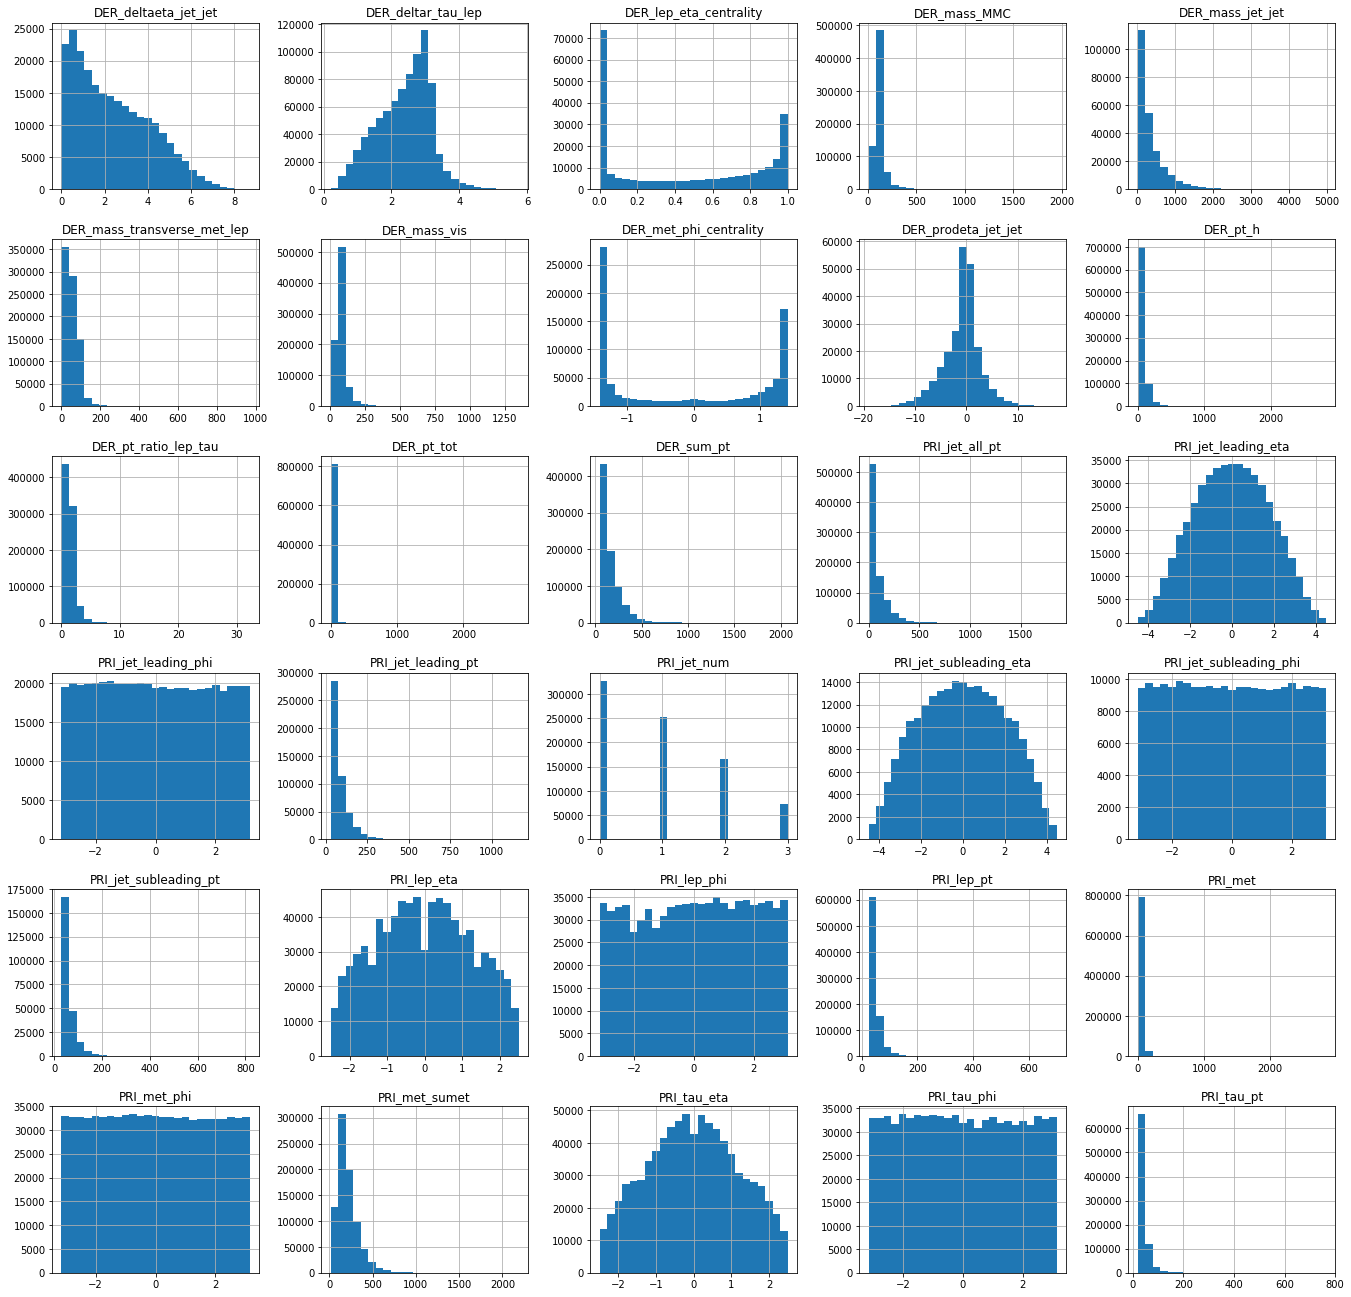

In [12]:
hist = data.hist(bins=25, figsize=(23,23))
plt.savefig('histograms.png')

# Selection of features

In [13]:
X = dataLabel[dataLabel.columns[0:30]].to_numpy()
X

array([[138.47 ,  51.655,  97.827, ...,   1.24 ,  -2.475, 113.497],
       [160.937,  68.768, 103.235, ...,     nan,     nan,  46.226],
       [    nan, 162.172, 125.953, ...,     nan,     nan,  44.251],
       ...,
       [108.497,   9.837,  65.149, ...,     nan,     nan,  -0.   ],
       [ 96.711,  20.006,  66.942, ...,     nan,     nan,  30.863],
       [ 92.373,  80.109,  77.619, ...,     nan,     nan,  -0.   ]])

In [14]:
impMean = SimpleImputer(missing_values=np.nan, strategy='mean')
impMean.fit(X) 
XMean = impMean.transform(X)
XMean

array([[ 1.38470000e+02,  5.16550000e+01,  9.78270000e+01, ...,
         1.24000000e+00, -2.47500000e+00,  1.13497000e+02],
       [ 1.60937000e+02,  6.87680000e+01,  1.03235000e+02, ...,
        -6.66904637e-03, -1.04697019e-02,  4.62260000e+01],
       [ 1.21867697e+02,  1.62172000e+02,  1.25953000e+02, ...,
        -6.66904637e-03, -1.04697019e-02,  4.42510000e+01],
       ...,
       [ 1.08497000e+02,  9.83700000e+00,  6.51490000e+01, ...,
        -6.66904637e-03, -1.04697019e-02, -0.00000000e+00],
       [ 9.67110000e+01,  2.00060000e+01,  6.69420000e+01, ...,
        -6.66904637e-03, -1.04697019e-02,  3.08630000e+01],
       [ 9.23730000e+01,  8.01090000e+01,  7.76190000e+01, ...,
        -6.66904637e-03, -1.04697019e-02, -0.00000000e+00]])

In [15]:
impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
impMedian.fit(X) 
XMedian = impMedian.transform(X)
XMedian

array([[ 1.38470e+02,  5.16550e+01,  9.78270e+01, ...,  1.24000e+00,
        -2.47500e+00,  1.13497e+02],
       [ 1.60937e+02,  6.87680e+01,  1.03235e+02, ..., -1.10000e-02,
        -2.00000e-02,  4.62260e+01],
       [ 1.12501e+02,  1.62172e+02,  1.25953e+02, ..., -1.10000e-02,
        -2.00000e-02,  4.42510e+01],
       ...,
       [ 1.08497e+02,  9.83700e+00,  6.51490e+01, ..., -1.10000e-02,
        -2.00000e-02, -0.00000e+00],
       [ 9.67110e+01,  2.00060e+01,  6.69420e+01, ..., -1.10000e-02,
        -2.00000e-02,  3.08630e+01],
       [ 9.23730e+01,  8.01090e+01,  7.76190e+01, ..., -1.10000e-02,
        -2.00000e-02, -0.00000e+00]])

In [16]:
y = dataLabel[dataLabel.columns[30]].to_numpy()
y

array(['s', 'b', 'b', ..., 'b', 'b', 'b'], dtype=object)

In [17]:
dataLabel.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Label'],
      dtype='object')

Feature ranking:
1. feature 0 (0.085746)
2. feature 1 (0.084041)
3. feature 11 (0.082260)
4. feature 2 (0.062785)
5. feature 7 (0.058931)
6. feature 13 (0.053842)
7. feature 10 (0.043356)
8. feature 19 (0.041516)
9. feature 9 (0.034988)
10. feature 17 (0.032831)
11. feature 3 (0.032740)
12. feature 16 (0.031976)
13. feature 14 (0.030806)
14. feature 8 (0.029889)
15. feature 21 (0.028623)
16. feature 18 (0.026247)
17. feature 20 (0.025790)
18. feature 15 (0.025726)
19. feature 24 (0.025168)
20. feature 4 (0.023349)
21. feature 12 (0.022456)
22. feature 23 (0.017537)
23. feature 29 (0.017152)
24. feature 22 (0.016300)
25. feature 6 (0.015846)
26. feature 25 (0.015368)
27. feature 5 (0.012417)
28. feature 27 (0.008383)
29. feature 28 (0.006996)
30. feature 26 (0.006934)


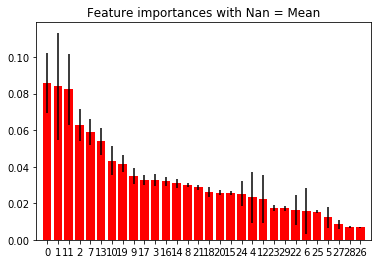

In [18]:
# Build a forest and compute the feature importances with Nan = mean
forestMean = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forestMean.fit(XMean, y)
importancesMean = forestMean.feature_importances_
stdMean = np.std([tree.feature_importances_ for tree in forestMean.estimators_],
             axis=0)
indicesMean = np.argsort(importancesMean)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(XMean.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indicesMean[f], importancesMean[indicesMean[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances with Nan = Mean")
plt.bar(range(XMean.shape[1]), importancesMean[indicesMean],
       color="r", yerr=stdMean[indicesMean], align="center")
plt.xticks(range(XMean.shape[1]), indicesMean)
plt.xlim([-1, XMean.shape[1]])
plt.savefig('importancesMean.png')
plt.show()


Feature ranking:
1. feature 0 (0.085245)
2. feature 11 (0.083968)
3. feature 1 (0.079587)
4. feature 2 (0.066321)
5. feature 7 (0.058086)
6. feature 13 (0.054345)
7. feature 10 (0.045726)
8. feature 19 (0.043659)
9. feature 3 (0.034023)
10. feature 17 (0.032531)
11. feature 9 (0.032487)
12. feature 16 (0.031803)
13. feature 14 (0.030945)
14. feature 8 (0.029574)
15. feature 21 (0.029113)
16. feature 18 (0.026203)
17. feature 20 (0.025842)
18. feature 15 (0.025749)
19. feature 24 (0.025228)
20. feature 4 (0.022727)
21. feature 12 (0.022504)
22. feature 29 (0.017173)
23. feature 23 (0.016895)
24. feature 25 (0.015336)
25. feature 22 (0.015015)
26. feature 6 (0.013342)
27. feature 5 (0.013015)
28. feature 27 (0.009550)
29. feature 26 (0.007036)
30. feature 28 (0.006973)


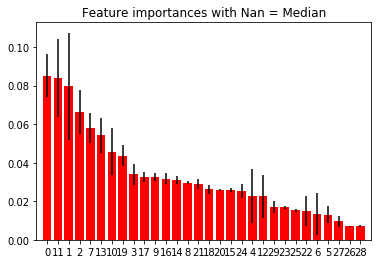

In [19]:
# Build a forest and compute the feature importances with Nan = median
forestMedian = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forestMedian.fit(XMedian, y)
importancesMedian = forestMedian.feature_importances_
stdMedian = np.std([tree.feature_importances_ for tree in forestMedian.estimators_],
             axis=0)
indicesMedian = np.argsort(importancesMedian)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(XMedian.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indicesMedian[f], importancesMedian[indicesMedian[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances with Nan = Median")
plt.bar(range(XMedian.shape[1]), importancesMedian[indicesMedian],
       color="r", yerr=stdMedian[indicesMedian], align="center")
plt.xticks(range(XMedian.shape[1]), indicesMedian)
plt.xlim([-1, XMedian.shape[1]])
plt.savefig('importancesMedian.png')
plt.show()

In [20]:
model = SelectFromModel(forestMean, prefit=True)
X_newMean = model.transform(XMean)
nbSelectedFeaturesMean = X_newMean.shape[1]
nbSelectedFeaturesMean

9

In [21]:
model = SelectFromModel(forestMedian, prefit=True)
X_newMedian = model.transform(XMedian)
nbSelectedFeaturesMedian = X_newMedian.shape[1]
nbSelectedFeaturesMedian

9

In [22]:
#Selected Features with Mean

finalDataMean = dataLabel[dataLabel.columns[indicesMean[0:9]]]
finalDataMean

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_met_phi_centrality,DER_mass_vis,DER_deltar_tau_lep,PRI_tau_pt,DER_pt_ratio_lep_tau,PRI_met,DER_sum_pt
0,138.470,51.655,1.396,97.827,3.064,32.638,1.582,16.824,197.760
1,160.937,68.768,1.414,103.235,3.473,42.014,0.879,44.704,125.157
2,NaN,162.172,1.414,125.953,3.148,32.154,3.776,54.283,197.814
3,143.905,81.417,-1.285,80.943,3.310,22.647,2.354,31.082,75.968
4,175.864,16.915,-1.385,134.805,3.891,28.209,1.056,2.723,57.983
...,...,...,...,...,...,...,...,...,...
818233,105.668,46.443,1.343,60.048,1.279,61.970,0.659,72.892,256.853
818234,99.294,30.097,1.398,62.713,2.294,28.711,1.429,34.940,248.582
818235,108.497,9.837,-0.836,65.149,2.742,41.478,0.642,30.463,68.097
818236,96.711,20.006,1.410,66.942,2.479,36.575,0.936,6.647,101.676


In [23]:
dataLabel.columns[indicesMean[0:9]]

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_met_phi_centrality',
       'DER_mass_vis', 'DER_deltar_tau_lep', 'PRI_tau_pt',
       'DER_pt_ratio_lep_tau', 'PRI_met', 'DER_sum_pt'],
      dtype='object')

In [24]:
#Selected Features with Median

finalDataMedian = dataLabel[dataLabel.columns[indicesMedian[0:9]]]
finalDataMedian

,DER_mass_MMC,DER_met_phi_centrality,DER_mass_transverse_met_lep,DER_mass_vis,DER_deltar_tau_lep,PRI_tau_pt,DER_pt_ratio_lep_tau,PRI_met,DER_pt_h
0,138.470,1.396,51.655,97.827,3.064,32.638,1.582,16.824,27.980
1,160.937,1.414,68.768,103.235,3.473,42.014,0.879,44.704,48.146
2,NaN,1.414,162.172,125.953,3.148,32.154,3.776,54.283,35.635
3,143.905,-1.285,81.417,80.943,3.310,22.647,2.354,31.082,0.414
4,175.864,-1.385,16.915,134.805,3.891,28.209,1.056,2.723,16.405
...,...,...,...,...,...,...,...,...,...
818233,105.668,1.343,46.443,60.048,1.279,61.970,0.659,72.892,156.191
818234,99.294,1.398,30.097,62.713,2.294,28.711,1.429,34.940,65.861
818235,108.497,-0.836,9.837,65.149,2.742,41.478,0.642,30.463,18.006
818236,96.711,1.410,20.006,66.942,2.479,36.575,0.936,6.647,29.761


In [25]:
dataLabel.columns[indicesMedian[0:9]]

Index(['DER_mass_MMC', 'DER_met_phi_centrality', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_deltar_tau_lep', 'PRI_tau_pt',
       'DER_pt_ratio_lep_tau', 'PRI_met', 'DER_pt_h'],
      dtype='object')

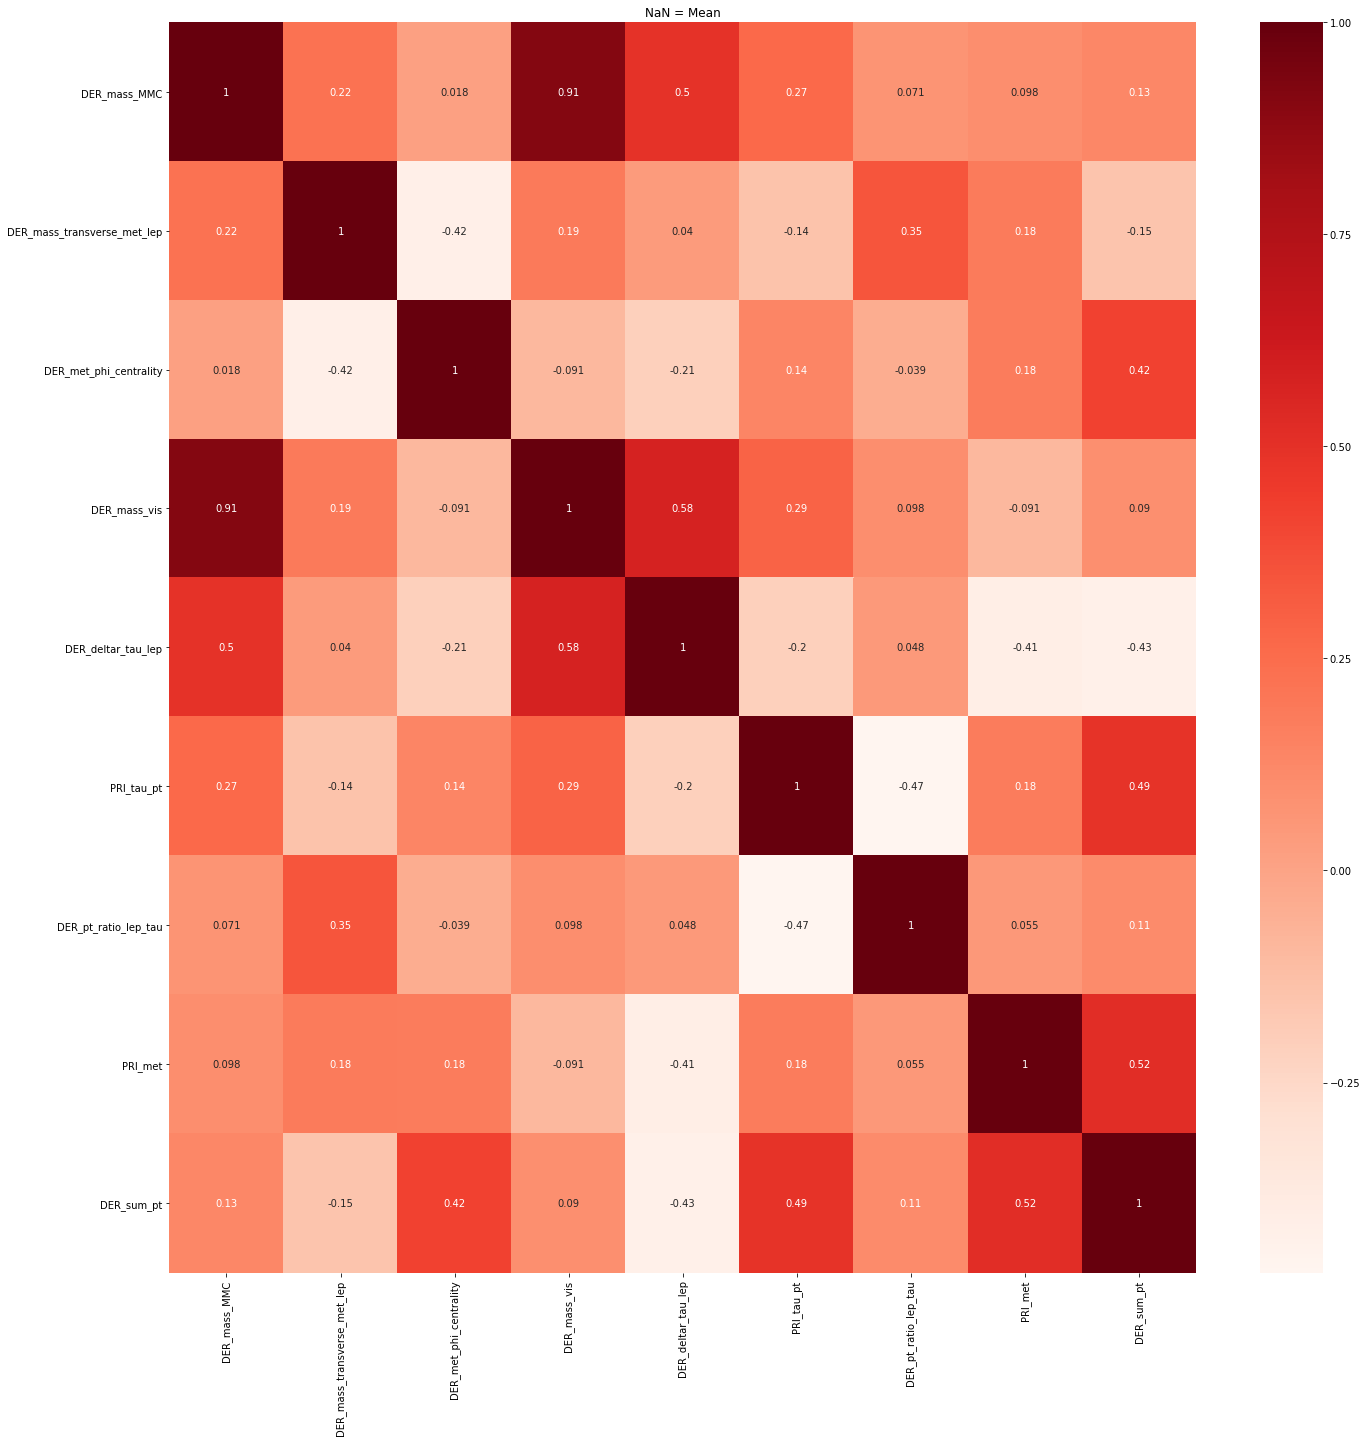

In [26]:
#HeatMap
plt.figure(figsize=(23,23))
plt.title("NaN = Mean")
cor = finalDataMean.corr()
cor.index = finalDataMean.columns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('newHeatmapMean.png')
plt.show()

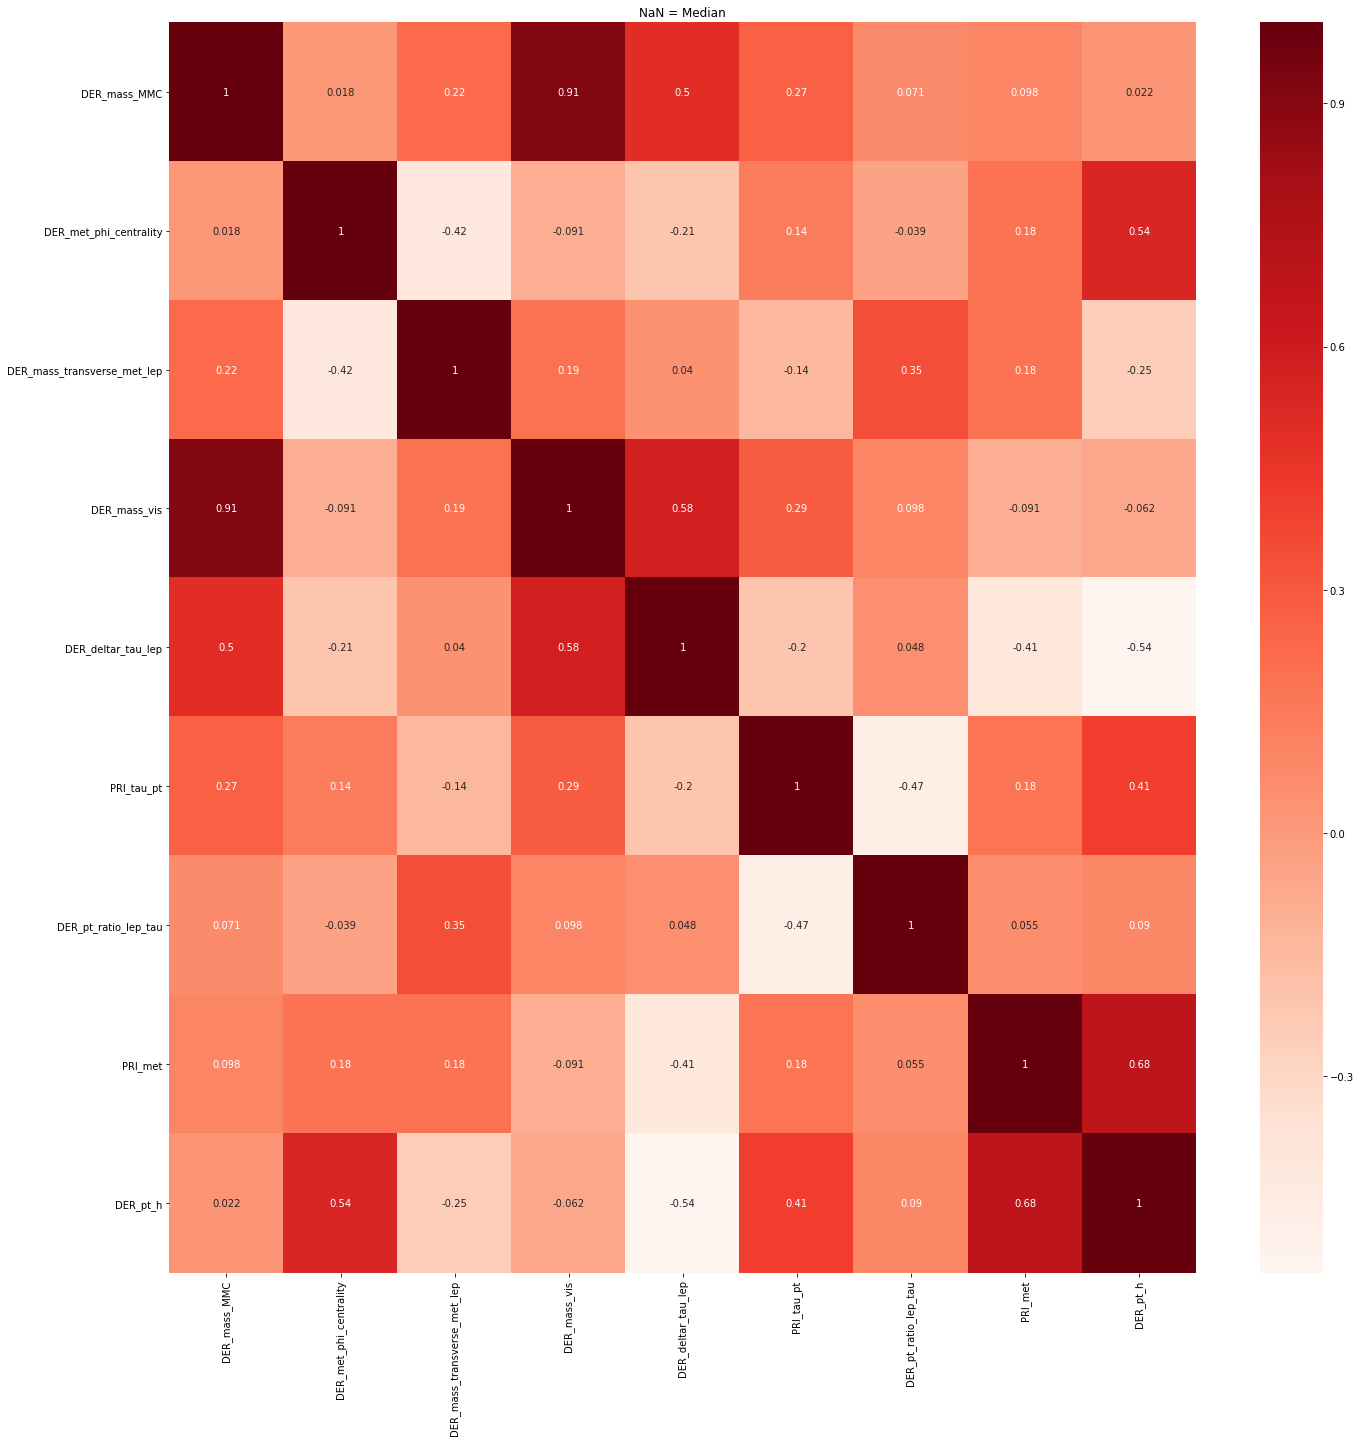

In [27]:
#HeatMap
plt.figure(figsize=(23,23))
plt.title("NaN = Median")
cor = finalDataMedian.corr()
cor.index = finalDataMedian.columns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('newHeatmapMedian.png')
plt.show()

### Evaluation des modèles

In [44]:
def random(X):
    return np.random.choice(['s','b'],len(X))

class Stratified:
    def __init__(self):
        pass
    def fit(self,Xtrain,ytrain):
        self.pb = ((y=='b').sum())/len(ytrain) # proba apparition b
        self.ps = ((y=='s').sum())/len(ytrain) # proba apparition s

    def predict(self,Xtest,ytest):
        return np.random.choice(['s','b'],len(Xtest),[self.ps,self.pb])

class Frequency:

    def __init__(self):
        pass

    def fit(self,Xtrain,ytrain):
        if (ytrain=='b').sum() > (ytrain=='s').sum():
            self.most_freq = 'b'
        else:
            self.most_freq = 's'
    
    def predict(self,Xtest,ytest):
        return np.random.choice([self.most_freq],len(ytest))

In [48]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import math


class Evaluation:
    def __init__(self):
        pass 

    @staticmethod
    def accuracy(ytrue,ypred):
        return accuracy_score(ytrue,ypred)

    @staticmethod
    def precision(ytrue,ypred):
        return precision_score(ytrue,ypred) 
    
    @staticmethod
    def rappel(ytrue,ypred):
        return recall_score(ytrue,ypred)

    @staticmethod
    def f1(ytrue,ypred):
        return f1_score(ytrue,ypred)
    
    @staticmethod
    def AMS(ytrue,ypred,weights):
        s=0
        b=0
        for i in range(len(ytrue)):
            if (ypred[i]=='s'):
                if (ytrue=='b'):
                    b+=weights[i]
                else :
                    s+=weights[i]
        AMS = np.sqrt(2*((s+b+10)*np.log(1+(s/(b+10)))-s))
        return AMS

    @staticmethod
    def affichage_score(model_name,ytrue,ypred,weights,prec=4):
        """
            model_name : nom du modèle utilisé pour l'affichage
        """
        print("\n\n------------------ Evaluation {} ------------------\n\n".format(model_name))
        print("|xxxxxxxxxxxxx|   ACCURACY  = {:.{prec}f}    |xxxxxxxxxxxx|".format(accuracy_score(ytrue,ypred),prec=prec))
        print("|xxxxxxxxxxxxx|   RECALL    = {:.{prec}f}    |xxxxxxxxxxxx|".format(recall_score(ytrue,ypred,pos_label="s"),prec=prec))
        print("|xxxxxxxxxxxxx|   PRECISION = {:.{prec}f}    |xxxxxxxxxxxx|".format(precision_score(ytrue,ypred,pos_label="s"),prec=prec))
        print("|xxxxxxxxxxxxx|   SCORE F1  = {:.{prec}f}    |xxxxxxxxxxxx|".format(f1_score(ytrue,ypred,pos_label="s"),prec=prec))
        print("|xxxxxxxxxxxxx|   AMS SCORE = {:.{prec}f}    |xxxxxxxxxxxx|\n\n".format(AMS(ytrue, ypred,weights),prec=prec))
#print("---------------- Evaluation {} -----------------".format(model_name))

# 2. BaseLine

### Recup data

In [28]:
X_train = (dataBrut.loc[dataBrut['KaggleSet'] == 't']).drop(['EventId','KaggleSet','KaggleWeight'],axis=1)
Y_train = X_train[dataLabel.columns[31]].to_numpy()
weights_train = X_train[dataLabel.columns[30]].to_numpy()
X_train = X_train.drop(['Weight','Label'],axis=1).to_numpy()

In [29]:
impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
impMedian.fit(X_train) 
X_train = impMedian.transform(X_train)

In [30]:
X_test = (dataBrut.loc[dataBrut['KaggleSet'] != 't']).drop(['EventId','Weight','KaggleSet','KaggleWeight'],axis=1)
Y_test = X_test[dataLabel.columns[31]].to_numpy()
weights_train = X_test[dataLabel.columns[30]].to_numpy()
X_test = X_test.drop(['Weight','Label'],axis=1).to_numpy()

In [31]:
impMedian = SimpleImputer(missing_values=np.nan, strategy='median')
impMedian.fit(X_test) 
X_test = impMedian.transform(X_test)

### Random

In [49]:
ypred_random = random(X_test)

### Stratified

In [52]:
stratified = Stratified()
stratified.fit(X_train,Y_train)
ypred_stratified = stratified.predict(X_test,Y_test)
ypred_stratified 

array(['b', 'b', 's', ..., 'b', 's', 'b'], dtype='<U1')

### Frequency

In [53]:
frequency = Frequency()
frequency.fit(X_train,Y_train)
ypred_frequency = frequency.predict(X_test,Y_test)
ypred_frequency

array(['b', 'b', 'b', ..., 'b', 'b', 'b'], dtype='<U1')

### Perceptron

In [32]:
#Create a perceptron for the baseline

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, Y_train) 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
ypred_perceptron = clf.predict(X_test)

array(['b', 'b', 'b', ..., 'b', 'b', 'b'], dtype='<U1')

### SVM

In [ ]:
from sklearn import svm

svm = svm.LinearSVC(gamma='scale')
svm.fit(X_train, Y_train) 


In [ ]:
ypred_svm = svm.predict(X_test)
ypred_svm

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_1 = DecisionTreeClassifier(random_state=0,max_depth=1)
tree_1.fit(X_train,Y_train)
ypred_tree1 = tree_1.predict(X_test)
ypred_tree1

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
ypred_gnb = gnb.fit(X_train, Y_train).predict(X_test)
ypred_gnb

# Méthode d'ensembles

### BaggingClassifier

In [34]:
from sklearn.ensemble import BaggingClassifier
#Bagging Classifier

clf2 = BaggingClassifier(n_estimators=30, random_state=0)
clf2.fit(X_train, Y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=30,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)

In [35]:
ypred_bag = clf2.predict(X_test)
clf2.score(X_test, Y_test)  

0.8327707756257061

### AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
#AdaBoosting

clf3 = AdaBoostClassifier(n_estimators=30, random_state=0)
clf3.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=0)

In [38]:
ypred_ada=clf3.predict(X_test)
clf3.score(X_test, Y_test)  

0.8071688271463717

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train,Y_train)
ypred_rf = rf.predict(X_test)

In [ ]:
print(rf.feature_importances_)